In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Input-output properties cells

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rootFolder = '/home/fernando/Dropbox/SUNY/2022/S1_netpyne/sim/'
# rootFolder = os.getcwd()
os.chdir(rootFolder)
print(rootFolder)
folder = os.listdir('cell_data/')
folder = sorted(folder)

savedata = 1 # Save Netpyne and BBP soma_voltage

/home/fernando/Dropbox/SUNY/2022/S1_netpyne/sim/


In [4]:
# !nrnivmodl mod

In [5]:
def loadTemplateName(cellnumber):     
    f = open(outFolder+'/template.hoc', 'r')
    for line in f.readlines():
        if 'begintemplate' in line:
            templatename = str(line)     
    templatename=templatename[:-1]        
    templatename=templatename[14:]
    return templatename

## Netpyne

In [6]:
from netpyne import specs, sim   

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

In [7]:
%matplotlib inline

In [8]:
## cfg  
cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration
cfg.duration = 4000.0 						            # Duration of the simulation, in ms
cfg.dt = 0.05								                # Internal integration timestep to use
cfg.verbose = False							                # Show detailed messages 
cfg.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
cfg.recordStep = 0.1 			
cfg.printRunTime = 0.1 # in sec			

cfg.seeds = {'conn': 1, 'stim': 1, 'loc': 1} 
cfg.hParams = {'celsius': 34, 'v_init': -71.0}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  
#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.filename = 'model_output2'  			# Set file output name
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = False	           	## Save json file
cfg.saveDataInclude = ['simData'] ## 'simData' , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = False			
cfg.saveCellConns = True	

cfg.analysis['plotTraces'] = {'include': [i for i in range(20)], 'oneFigPer': 'trace', 'overlay': True, 'timeRange': [0,4000], 'saveFig': False, 'showFig': True, 'figSize':(12,4)} # Plot recorded traces for this list of cells
# cfg.analysis['plotShape'] = {'includePre': [0],'includePre': [0], 'saveFig': True, 'showFig': True, 'figSize':(12,12)}


In [9]:
# for i,metype in enumerate(folder):
#     print(i,metype)
folder[760:770]

['L5_TTPC1_cADpyr232_1',
 'L5_TTPC1_cADpyr232_2',
 'L5_TTPC1_cADpyr232_3',
 'L5_TTPC1_cADpyr232_4',
 'L5_TTPC1_cADpyr232_5',
 'L5_TTPC2_cADpyr232_1',
 'L5_TTPC2_cADpyr232_2',
 'L5_TTPC2_cADpyr232_3',
 'L5_TTPC2_cADpyr232_4',
 'L5_TTPC2_cADpyr232_5']

In [10]:
#------------------------------------------------------------------------------
# Cell parameters
#------------------------------------------------------------------------------
#StochKv_deterministic.mod
for cellnumber in range(760,770):
    cellName = folder[cellnumber]
    outFolder = rootFolder+'/cell_data/'+folder[cellnumber]
    cellTemplateName = loadTemplateName(cellnumber)
    cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=False,
        conds={'cellType': cellName, 'cellModel': 'HH_full'},
        fileName='cellwrapper.py',
        cellName='loadCell',
        cellInstance = True,
        cellArgs={'cellName': cellName, 'cellTemplateName': cellTemplateName})

NEURON: morphology_0fb1ca4724 : a template cannot be redefined
 in morphology.hoc near line 34
 begintemplate morphology_0fb1ca4724
                                   ^
        xopen("morphology.hoc")
      execute1("{xopen("mo...")
    load_file("morphology.hoc")
  xopen("template.hoc")
NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")
      execute1("{xopen("bi...")
    load_file("biophysics.hoc")
  xopen("template.hoc")
NEURON: synapses_0fb1ca4724 : a template cannot be redefined
 in synapses.hoc near line 31
 begintemplate synapses_0fb1ca4724                
                                 ^
        xopen("synapses.hoc")
      execute1("{xopen("sy...")
    load_file("synapses/s...")
  xopen("template.hoc")


	0 
	0 
	0 
cADpyr232_L5_TTPC1_0fb1ca4724[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_TTPC1_fc944c2cf3[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_TTPC1_da1088139b[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_TTPC1_ded64abc4d[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_TTPC1_b6836fcf6f[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_TTPC2_8052133265[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_TTPC2_a28017c6c7[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_TTPC2_a467781f53[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_TTPC2_c46a93702c[0]


NEURON: cADpyr232_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr232_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr232_L5_TTPC2_8bab918b58[0]


In [11]:
for cellnumber in range(760,770):
    # ---------------------------------------------------------------------------------------------------- #
    cellName = folder[cellnumber]
    outFolder = rootFolder+'/cell_data/'+folder[cellnumber]
    cellTemplateName = loadTemplateName(cellnumber)
    
    # ---------------------------------------------------------------------------------------------------- #
    netParams.renameCellParamsSec(label=cellName, oldSec='soma_0', newSec='soma')
    
    for secname2 in netParams.cellParams[cellName]['secLists'].keys():
        if 'soma_0' in netParams.cellParams[cellName]['secLists'][secname2]:
            print(cellName,secname2,netParams.cellParams[cellName]['secLists'][secname2][0])
            netParams.cellParams[cellName]['secLists'][secname2][0] = 'soma'
    # ---------------------------------------------------------------------------------------------------- #
    
    nonSpiny = ['axon_0', 'axon_1']
    netParams.cellParams[cellName]['secLists']['spiny'] = [sec for sec in netParams.cellParams[cellName]['secLists']['all'] if sec not in nonSpiny]
    nonSpinyEE = ['axon_0', 'axon_1', 'soma']
    netParams.cellParams[cellName]['secLists']['spinyEE'] = [sec for sec in netParams.cellParams[cellName]['secLists']['all'] if sec not in nonSpinyEE]    
    
    # ---------------------------------------------------------------------------------------------------- #
    for ii in range(2):
        netParams.popParams[cellName + '_' + str(ii)] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}

L5_TTPC1_cADpyr232_1 all soma_0
L5_TTPC1_cADpyr232_1 somatic soma_0
L5_TTPC1_cADpyr232_2 all soma_0
L5_TTPC1_cADpyr232_2 somatic soma_0
L5_TTPC1_cADpyr232_3 all soma_0
L5_TTPC1_cADpyr232_3 somatic soma_0
L5_TTPC1_cADpyr232_4 all soma_0
L5_TTPC1_cADpyr232_4 somatic soma_0
L5_TTPC1_cADpyr232_5 all soma_0
L5_TTPC1_cADpyr232_5 somatic soma_0
L5_TTPC2_cADpyr232_1 all soma_0
L5_TTPC2_cADpyr232_1 somatic soma_0
L5_TTPC2_cADpyr232_2 all soma_0
L5_TTPC2_cADpyr232_2 somatic soma_0
L5_TTPC2_cADpyr232_3 all soma_0
L5_TTPC2_cADpyr232_3 somatic soma_0
L5_TTPC2_cADpyr232_4 all soma_0
L5_TTPC2_cADpyr232_4 somatic soma_0
L5_TTPC2_cADpyr232_5 all soma_0
L5_TTPC2_cADpyr232_5 somatic soma_0


In [12]:
for cellnumber in range(760,770):
    cellName = folder[cellnumber]
    print(netParams.cellParams[cellName]['secLists']['basal'][-1])

dend_112
dend_112
dend_112
dend_112
dend_82
dend_79
dend_95
dend_95
dend_95
dend_95


In [13]:
# create custom list of spike times
# spkTimes = [2000,2500,3000,3500,4000,4500]
spkTimes = [500,2500,2550,2600,2650,2700,2750,2800,2850,2900,3400]

netParams.popParams['presyn'] = {'cellModel': 'VecStim', 'numCells': 1, 'spkTimes': spkTimes}  # VecStim with spike times

In [14]:
netParams.cellParams.keys()

odict_keys(['L5_TTPC1_cADpyr232_1', 'L5_TTPC1_cADpyr232_2', 'L5_TTPC1_cADpyr232_3', 'L5_TTPC1_cADpyr232_4', 'L5_TTPC1_cADpyr232_5', 'L5_TTPC2_cADpyr232_1', 'L5_TTPC2_cADpyr232_2', 'L5_TTPC2_cADpyr232_3', 'L5_TTPC2_cADpyr232_4', 'L5_TTPC2_cADpyr232_5'])

In [15]:
list(netParams.popParams.keys())[0:-1]

['L5_TTPC1_cADpyr232_1_0',
 'L5_TTPC1_cADpyr232_1_1',
 'L5_TTPC1_cADpyr232_2_0',
 'L5_TTPC1_cADpyr232_2_1',
 'L5_TTPC1_cADpyr232_3_0',
 'L5_TTPC1_cADpyr232_3_1',
 'L5_TTPC1_cADpyr232_4_0',
 'L5_TTPC1_cADpyr232_4_1',
 'L5_TTPC1_cADpyr232_5_0',
 'L5_TTPC1_cADpyr232_5_1',
 'L5_TTPC2_cADpyr232_1_0',
 'L5_TTPC2_cADpyr232_1_1',
 'L5_TTPC2_cADpyr232_2_0',
 'L5_TTPC2_cADpyr232_2_1',
 'L5_TTPC2_cADpyr232_3_0',
 'L5_TTPC2_cADpyr232_3_1',
 'L5_TTPC2_cADpyr232_4_0',
 'L5_TTPC2_cADpyr232_4_1',
 'L5_TTPC2_cADpyr232_5_0',
 'L5_TTPC2_cADpyr232_5_1']

In [16]:
import scipy.stats as stats

#E2 -> syn 119 E2 EE 0.68±0.46 1.74±0.18 0.46±0.260 671±17 17±5 L23_PC:L23_PC

# lower, upper = 0.44, 0.48
# mu, sigma = 0.46, 0.26
# X = stats.truncnorm(
#     (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

# Use = X.rvs(20)

# for ii in range(20):
#     netParams.synMechParams['L23_PC:L23_PC_'+str(ii+1)] = {'mod': 'ProbAMPANMDA_EMS',
#                                           'Dep': 671,
#                                           'Fac': 17,
#                                           'Use': 0.46/4.0,
#                                           'tau_r_AMPA': 0.2,
#                                           'tau_d_AMPA': 1.74,
#                                           'NMDA_ratio': 0.8,
#                                           'tau_r_NMDA': 0.29,
#                                           'tau_d_NMDA': 43.0} 
    
#E2 -> syn 123 E2 EE 1.50±1.05 1.74±0.18 0.50±0.020 671±17 17±5 L5_TTPC:L5_TTPC


for ii in range(20):
    netParams.synMechParams['L5_TTPC:L5_TTPC'+str(ii+1)] = {'mod': 'ProbAMPANMDA_EMS',
                                          'Dep': 671,
                                          'Fac': 17,
                                          'Use': 0.50/1.0,
                                          'tau_r_AMPA': 0.2,
                                          'tau_d_AMPA': 1.74,
                                          'NMDA_ratio': 0.8,
                                          'tau_r_NMDA': 0.29,
                                          'tau_d_NMDA': 43.0} 
    

In [17]:
import random

# lower, upper = 0.2243, 1.1426
# mu, sigma = 0.68, 0.46
# X = stats.truncnorm(
#     (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

# weight = X.rvs(20)

## Cell connectivity rules
for ii in range(20):
    
    listsecs = random.sample( netParams.cellParams[cellName]['secLists']['spinyEE'], len(netParams.cellParams[cellName]['secLists']['spinyEE']))
    
#     netParams.connParams['pre->post'+str(ii+1)] = { 
#             'preConds': {'pop': 'presyn'},
#             'postConds': {'pop': list(netParams.popParams.keys())[ii]},
#             'sec': listsecs,                  # target postsyn section
#             'synMech': 'L23_PC:L23_PC_'+str(ii+1),              # target synaptic mechanism
#             'weight': 0.68, # 'max(0.33*0.68, normal(0.68,0.46))',                 # synaptic weight 
#             'synsPerConn': 3, # 'int(max(0.667*3.0, normal(3.0, 1.4)))',
#             'delay': 0.05}   
    
    netParams.connParams['pre->post'+str(ii+1)] = { 
            'preConds': {'pop': 'presyn'},
            'postConds': {'pop': list(netParams.popParams.keys())[ii]},
            'sec': listsecs,                  # target postsyn section
            'synMech': 'L5_TTPC:L5_TTPC'+str(ii+1),              # target synaptic mechanism
            'weight': 1.5,  # synaptic weight 
            'synsPerConn': 6, 
            'delay': 0.05}       
    

In [18]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params


Start time:  2023-03-30 16:42:21.335146

Creating network of 21 cell populations on 1 hosts...
  Number of cells on node 0: 21 
  Done; cell creation time = 1.11 s.
Making connections...
  Number of connections on node 0: 20 
  Number of synaptic contacts on node 0: 120 
  Done; cell connection time = 0.01 s.


[[{preGid: 20, sec: 'apic_10', loc: 0.8856716213287655, synMech: 'L5_TTPC:L5_TTPC1', weight: 1.5, delay: 0.05, label: 'pre->post1', hObj: NetCon[0]},
  {preGid: 20, sec: 'dend_9', loc: 0.221073280300834, synMech: 'L5_TTPC:L5_TTPC1', weight: 1.5, delay: 0.05, label: 'pre->post1', hObj: NetCon[1]},
  {preGid: 20, sec: 'apic_39', loc: 0.05230509121844475, synMech: 'L5_TTPC:L5_TTPC1', weight: 1.5, delay: 0.05, label: 'pre->post1', hObj: NetCon[2]},
  {preGid: 20, sec: 'apic_62', loc: 0.7937988840637024, synMech: 'L5_TTPC:L5_TTPC1', weight: 1.5, delay: 0.05, label: 'pre->post1', hObj: NetCon[3]},
  {preGid: 20, sec: 'apic_13', loc: 0.9041080756978027, synMech: 'L5_TTPC:L5_TTPC1', weight: 1.5, delay: 0.05, label: 'pre->post1', hObj: NetCon[4]},
  {preGid: 20, sec: 'dend_55', loc: 0.49690308931828353, synMech: 'L5_TTPC:L5_TTPC1', weight: 1.5, delay: 0.05, label: 'pre->post1', hObj: NetCon[5]}],
 [{preGid: 20, sec: 'dend_6', loc: 0.49768760656708183, synMech: 'L5_TTPC:L5_TTPC2', weight: 1.5, d

In [19]:
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)

  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.
Recording 20 traces of 1 types on node 0


{spkt: Vector[66744], spkid: Vector[66745], V_soma: {cell_0: Vector[66746], cell_1: Vector[66747], cell_2: Vector[66748], cell_3: Vector[66749], cell_4: Vector[66750], cell_5: Vector[66751], cell_6: Vector[66752], cell_7: Vector[66753], cell_8: Vector[66754], cell_9: Vector[66755], cell_10: Vector[66756], cell_11: Vector[66757], cell_12: Vector[66758], cell_13: Vector[66759], cell_14: Vector[66760], cell_15: Vector[66761], cell_16: Vector[66762], cell_17: Vector[66763], cell_18: Vector[66764], cell_19: Vector[66765]}, t: Vector[66766], _repr_mimebundle_: {}}

In [20]:
sim.runSim()                      			# run Neuron simulation  

0.0s

Running simulation using NEURON for 4000.0 ms...
0.1s
0.2s
0.3s
0.4s
0.5s
0.6s
0.7s
0.8s
0.9s
1.0s
1.1s
1.2s
1.3s
1.4s
1.5s
1.6s
1.7s
1.8s
1.9s
2.0s
2.1s
2.2s
2.3s
2.4s
2.5s
2.6s
2.7s
2.8s
2.9s
3.0s
3.1s
3.2s
3.3s
3.4s
3.5s
3.6s
3.7s
3.8s
3.9s
4.0s
  Done; run time = 703.90 s; real-time ratio: 0.01.



Gathering data...
  Done; gather time = 0.04 s.

Analyzing...
  Cells: 21
  Connections: 20 (0.95 per cell)
  Synaptic contacts: 120 (5.71 per cell)
  Spikes: 11 (0.13 Hz)
  Simulated time: 4.0 s; 1 workers
  Run time: 703.90 s
Plotting recorded cell traces ... trace


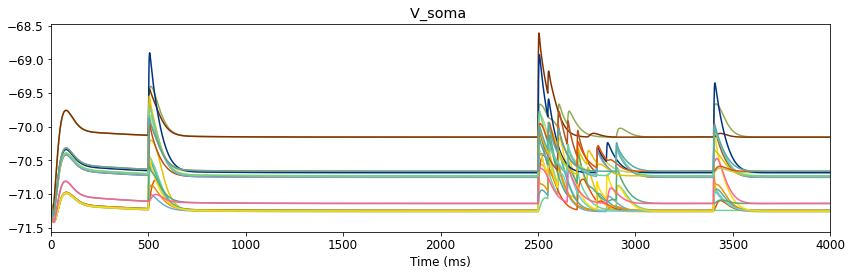

  Done; plotting time = 0.25 s

Total time = 705.38 s


In [21]:
sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()         			# plot spike raster etc

In [22]:
# sim.analysis.plotRaster(figSize=(10, 3))

Plotting recorded cell traces ... trace


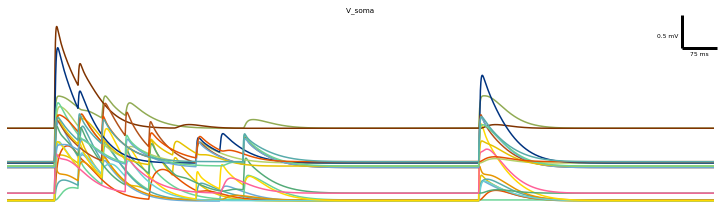

L5_TTPC:L5_TTPC in silico PSP amplitude (mV; mean ± SD) = 0.947±0.292


In [23]:
alltraces = []
gmax1 = []

# spkTimes = [500,2500,2550,2600,2650,2700,2750,2800,2850,2900,3400]


Traces2 = sim.analysis.plotTraces(oneFigPer='trace', overlay=1, timeRange=[2400,3900],axis=False,legend=False,scaleBarLoc=1,figSize=(10, 3),fontSize=6)
for number in range(20):
    if np.max(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'])-np.min(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma']) > 0.01:
        alltraces.append(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'])
        gmax1.append(np.max(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'])-np.min(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma']))
#         print(number,np.max(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'])-np.min(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma']))


# Traces2 = sim.analysis.plotTraces(oneFigPer='trace', overlay=1, timeRange=[3300,3900],axis=False,legend=False,scaleBarLoc=1,figSize=(10, 3),fontSize=6)
# for number in range(20):
#     if np.max(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'])-np.min(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma']) > 0.01:
#         alltraces.append(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'])
#         gmax1.append(np.max(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'])-np.min(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma']))
# #         print(number,np.max(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'])-np.min(Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma']))


# print('L23_PC:L23_PC in silico PSP amplitude (mV; mean ± SD) = %.3f±%.3f' % (np.mean(gmax1),np.std(gmax1)))
print('L5_TTPC:L5_TTPC in silico PSP amplitude (mV; mean ± SD) = %.3f±%.3f' % (np.mean(gmax1),np.std(gmax1)))

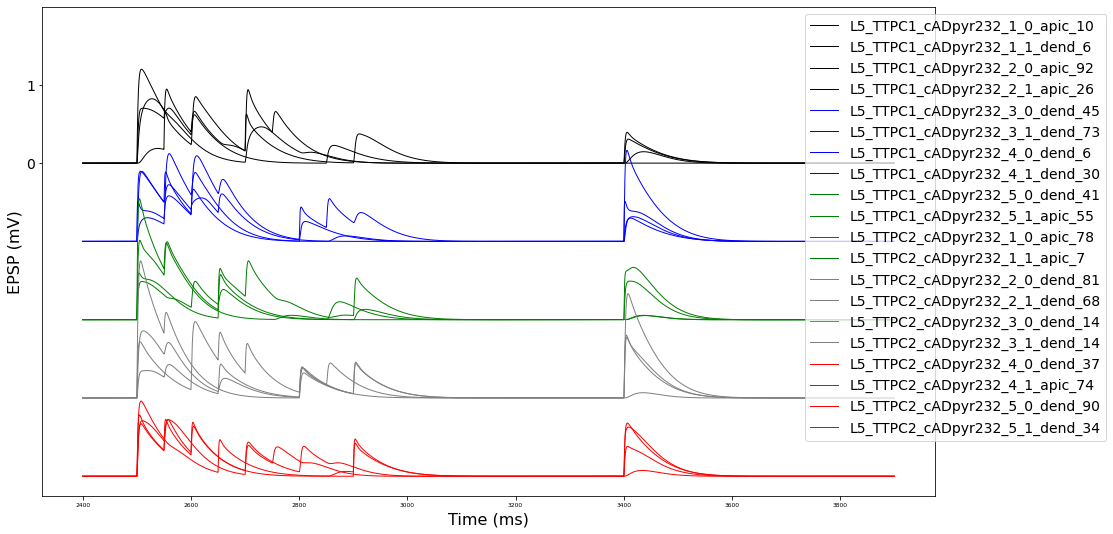

In [24]:
figSize = (16,9)
fig = plt.figure(figsize=figSize)  # Open a new figure
clr = ["black", "blue","green","gray", "red"]
number=0
for i in range(5):
    for number2 in range(i,20,5):
        plt.plot(Traces2[1]['tracesData'][number]['t'][1:],Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma']-Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'][999]-1.0*i, label= sim.net.allCells[number]['tags']['pop'] + '_' + sim.net.allCells[number]['conns'][0]['sec'], linewidth=1.0, color=clr[i])
        number+=1
        
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), fontsize=14)
# plt.xlim(2400,4150)
plt.ylim(-4.25,2.0)
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('EPSP (mV)', fontsize=16)
# plt.xticks(range(2400,3900,200), range(0,1500,200), fontsize=14);
plt.yticks([0,1], fontsize=14);

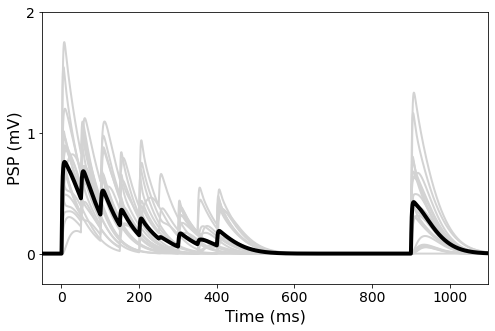

In [25]:
figSize = (8,5)
fig = plt.figure(figsize=figSize)  # Open a new figure
for number in range(np.shape(alltraces)[0]):
    plt.plot(alltraces[number]-alltraces[number][0],color = 'lightgray',linewidth=2.0)

plt.plot(np.mean(alltraces, axis=0)-np.mean(alltraces, axis=0)[0],color = 'black', linewidth=4.0)
# plt.legend(loc='upper right', bbox_to_anchor=(0.95, 1.0))
plt.xlim(500,12000)
plt.ylim(-0.25,1.5)
plt.xlabel('Time (ms)', fontsize=16)
plt.ylabel('PSP (mV)', fontsize=16)
plt.xticks(range(1000,12000,2000), range(0,1100,200), fontsize=14);
plt.yticks([0,1,2], fontsize=14); 

plt.savefig('../info/syn_gmax_L5TTPC_L5TTPC_cao2.0.png', facecolor = 'white' , dpi=300)

In [26]:
# (0.8355167606552806, 25)

In [27]:
np.mean(gmax1), np.size(gmax1)

(0.9469785109667747, 20)

<!-- Connection type	s-type	in vitro PSP amplitude (mV; mean ± SD)	in silico PSP amplitude (mV; mean ± SD)	Input data sources
L5TTPC-L5MC	E1	0.28 ± 0.3	0.28 ± 0.18	Silberberg & Markram, 2007
L5MC-L5TTPC	I2	0.5 ± 0.3	0.57 ± 0.5	Silberberg & Markram, 2007
L4SS-L23PC	E2	0.7 ± 0.6	0.7 ± 0.9	Feldmeyer et al. 2002
L5STPC-L5STPC	E2	0.9 ± 0.7	0.91 ± 0.8	Le Bé et al. 2007
L5UTPC-L5UTPC	E2	0.9 ± 0.7	0.91 ± 0.8	Le Bé et al. 2007
L23PC-L23PC	E2	1 ± 0.7	1 ± 0.3	Feldmeyer et al. 2006
L23LBC-L23PC	I2	1.2 ± 1.1	1.2 ± 1.02	Blatow et al. 2003
L23NBC-L23PC	I2	1.2 ± 1.1	1.2 ± 1.02	Blatow et al. 2003
L5TTPC-L5TTPC	E2	1.3 ± 1.1	1.2 ± 0.43	Markram et al. 1997
L4SS-L4SS	E2	1.6 ± 1.0	1.9 ± 1.5	Feldmeyer et al. 1999
L4SP-L4SP	E2	1.6 ± 1.0	1.9 ± 1.5	Feldmeyer et al. 1999
L4PC-L4PC	E2	1.6 ± 1.0	1.9 ± 1.5	Feldmeyer et al. 1999
L5TTPC-L5SBC	E2	2.1 ± 1.0	1.96 ± 0.67	Angulo et al. 1999 -->
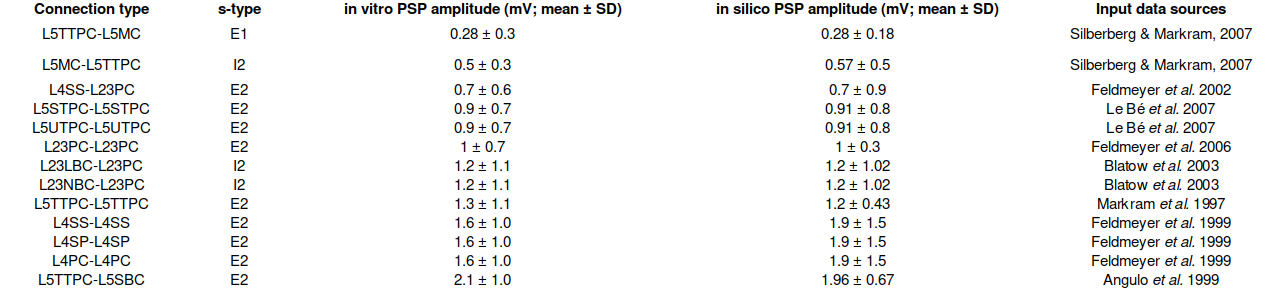

In [28]:
Connectiontype = ['L5TTPC_L5MC_E1', 'L5MC_L5TTPC_I2', 'L4SS_L23PC_E2', 'L5STPC_L5STPC_E2', 'L5UTPC_L5UTPC_E2', 'L23PC_L23PC_E2', 
                  'L23LBC_L23PC_I2', 'L23NBC_L23PC_I2', 'L5TTPC_L5TTPC_E2', 'L4SS_L4SS_E2', 'L4SP_L4SP_E2', 'L4PC_L4PC_E2', 'L5TTPC_L5SBC_E2']

In [29]:
table13c = [0.28, 0.3, 0.28, 0.18, 0.50, 0.3, 0.57, 0.50, 0.70, 0.6, 0.70, 0.90, 0.90, 0.7, 0.91, 0.80, 0.90, 0.7, 0.91, 0.80, 
            1.00, 0.7, 1.00, 0.30, 1.20, 1.1, 1.20, 1.02, 1.20, 1.1, 1.20, 1.02, 1.30, 1.1, 1.20, 0.43, 1.60, 1.0, 1.90, 1.50, 
            1.60, 1.0, 1.90, 1.50, 1.60, 1.0, 1.90, 1.50, 2.10, 1.0, 1.96, 0.67]

In [30]:
x = []
sx = []
y = []
sy = []

for ii in range(13):
    print(Connectiontype[ii],table13c[4*ii],table13c[4*ii+1],table13c[4*ii+2],table13c[4*ii+3])
    x.append(table13c[4*ii])
    sx.append(table13c[4*ii+1])
    y.append(table13c[4*ii+2])
    sy.append(table13c[4*ii+3])    

L5TTPC_L5MC_E1 0.28 0.3 0.28 0.18
L5MC_L5TTPC_I2 0.5 0.3 0.57 0.5
L4SS_L23PC_E2 0.7 0.6 0.7 0.9
L5STPC_L5STPC_E2 0.9 0.7 0.91 0.8
L5UTPC_L5UTPC_E2 0.9 0.7 0.91 0.8
L23PC_L23PC_E2 1.0 0.7 1.0 0.3
L23LBC_L23PC_I2 1.2 1.1 1.2 1.02
L23NBC_L23PC_I2 1.2 1.1 1.2 1.02
L5TTPC_L5TTPC_E2 1.3 1.1 1.2 0.43
L4SS_L4SS_E2 1.6 1.0 1.9 1.5
L4SP_L4SP_E2 1.6 1.0 1.9 1.5
L4PC_L4PC_E2 1.6 1.0 1.9 1.5
L5TTPC_L5SBC_E2 2.1 1.0 1.96 0.67


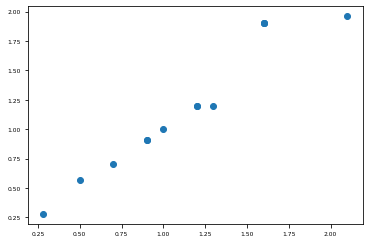

In [31]:
import matplotlib.pyplot as plt

# a = [1, 3, 5, 7]
# b = [11, -2, 4, 19]
# plt.scatter(a, b)


# c = [1, 3, 2, 1]
# d = [1, 3, 2, 1]

# you can use color ="r" for red or skip to default as blue
# plt.errorbar(x, y, xerr=sx, yerr=sy, fmt="o", color="r")
plt.scatter(x, y)

plt.show()
